In [24]:
import pandas as pd
import numpy as np
import os

# Datei laden
df = pd.read_csv("data/train_data.csv")

# Formelkonstante
tau = 219  # N/mm²

# Formel: d = 4 * sqrt(t), F_pull = (π / 4) * d² * τ
def compute_physical_pull(t):
    d = 4 * np.sqrt(t)
    return (np.pi / 4) * d ** 2 * tau

# Neue Spalte berechnen (aus "Thickness A+B (mm)")
df["F_pull_physical"] = compute_physical_pull(df["Thickness A+B (mm)"])

# Neue Datei speichern
output_path = "data/train_data_with_physical_pull.csv"
df.to_csv(output_path, index=False)

print(f"✅ Datei gespeichert unter: {output_path}")


✅ Datei gespeichert unter: data/train_data_with_physical_pull.csv


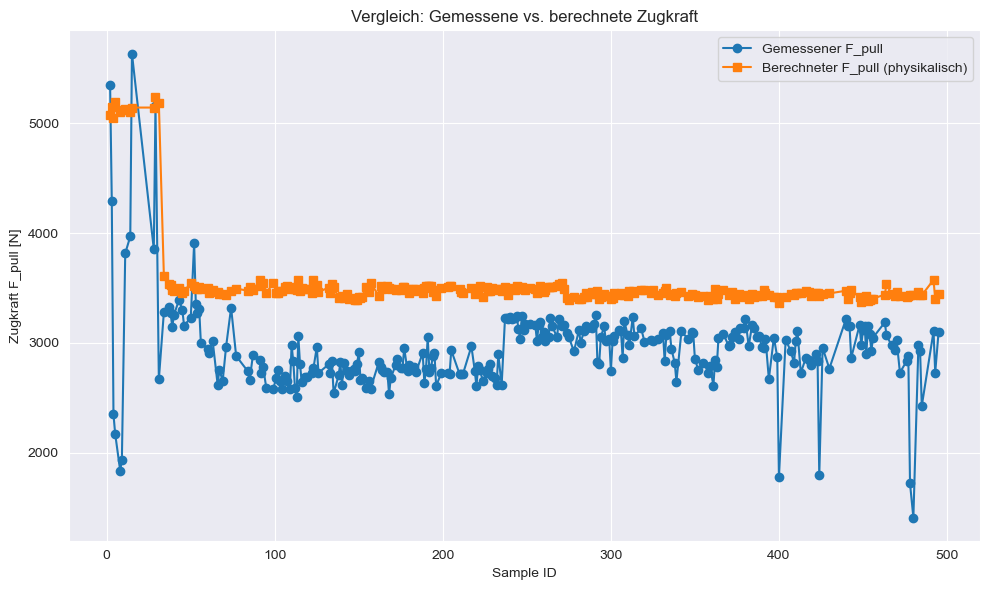

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Erweiterten Datensatz laden
df = pd.read_csv("data/train_data_with_physical_pull.csv")

# Nach Sample ID oder Index sortieren, damit die Linien nicht springen
df_sorted = df.sort_values("Sample ID")  # oder einfach df.sort_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_sorted["Sample ID"], df_sorted["PullTest (N)"], label="Gemessener F_pull", marker='o')
plt.plot(df_sorted["Sample ID"], df_sorted["F_pull_physical"], label="Berechneter F_pull (physikalisch)", marker='s')

plt.xlabel("Sample ID")
plt.ylabel("Zugkraft F_pull [N]")
plt.title("Vergleich: Gemessene vs. berechnete Zugkraft")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


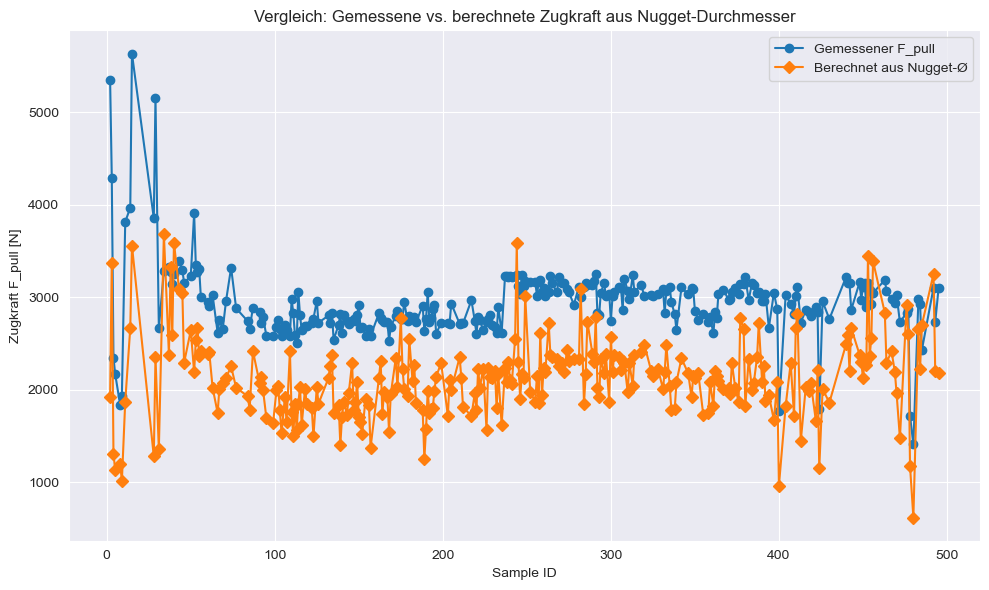

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Daten einlesen
df = pd.read_csv("data/train_data.csv")

# Konstante Scherfestigkeit
tau = 219  # N/mm²

# Neue Spalte berechnen
df["F_pull_from_nugget"] = (np.pi / 4) * df["NuggetDiameter (mm)"] ** 2 * tau

# Optional: neuen Datensatz speichern
df.to_csv("data/train_data_with_nugget_pull.csv", index=False)

# Plot: Vergleich tatsächlicher vs. berechneter Werte
df_sorted = df.sort_values("Sample ID")

plt.figure(figsize=(10, 6))
plt.plot(df_sorted["Sample ID"], df_sorted["PullTest (N)"], label="Gemessener F_pull", marker='o')
plt.plot(df_sorted["Sample ID"], df_sorted["F_pull_from_nugget"], label="Berechnet aus Nugget-Ø", marker='D')

plt.xlabel("Sample ID")
plt.ylabel("Zugkraft F_pull [N]")
plt.title("Vergleich: Gemessene vs. berechnete Zugkraft aus Nugget-Durchmesser")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
import pandas as pd
import numpy as np

# Parameter
tau = 219  # in N/mm²

# Daten laden
df = pd.read_csv("data/train_data.csv")

# Berechnung basierend auf Gesamtdicke (Thickness A+B)
df["F_pull_thickness"] = (np.pi / 4) * (4 * np.sqrt(df["Thickness A+B (mm)"]))**2 * tau

# Berechnung basierend auf NuggetDiameter
df["F_pull_nugget"] = (np.pi / 4) * df["NuggetDiameter (mm)"]**2 * tau

# Abweichung zum echten Wert
df["Abweichung_thickness"] = np.abs(df["PullTest (N)"] - df["F_pull_thickness"])
df["Abweichung_nugget"] = np.abs(df["PullTest (N)"] - df["F_pull_nugget"])

# Durchschnittliche Abweichung berechnen
mean_abs_error_thickness = df["Abweichung_thickness"].mean()
mean_abs_error_nugget = df["Abweichung_nugget"].mean()

print(f"Durchschnittliche Abweichung (Gesamtdicke): {mean_abs_error_thickness:.2f} N")
print(f"Durchschnittliche Abweichung (Nugget-Durchmesser): {mean_abs_error_nugget:.2f} N")

# Neue CSV speichern
df.to_csv("train_data_with_Fpull.csv", index=False)
print("Neue Datei gespeichert: train_data_with_Fpull.csv")


Durchschnittliche Abweichung (Gesamtdicke): 605.15 N
Durchschnittliche Abweichung (Nugget-Durchmesser): 828.06 N
Neue Datei gespeichert: train_data_with_Fpull.csv


Durchschnittliche Abweichung (Gesamtdicke): 605.15 N
Durchschnittliche Abweichung (Nugget-Durchmesser): 828.06 N


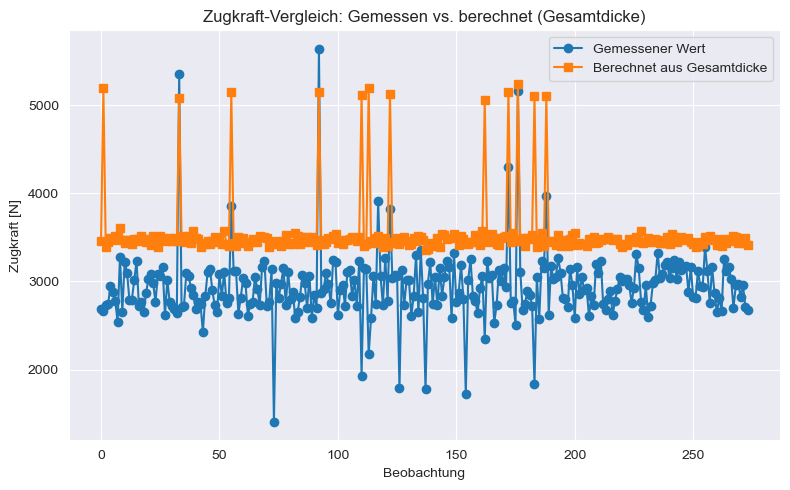

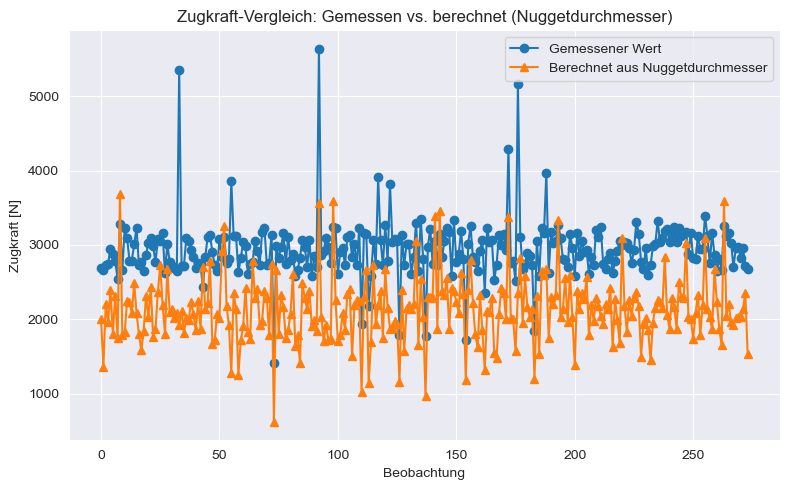

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parameter
tau = 219  # in N/mm²

# Daten laden
df = pd.read_csv("data/train_data.csv")

# Berechnung basierend auf Gesamtdicke (Thickness A+B)
df["F_pull_thickness"] = (np.pi / 4) * (4 * np.sqrt(df["Thickness A+B (mm)"]))**2 * tau

# Berechnung basierend auf NuggetDiameter
df["F_pull_nugget"] = (np.pi / 4) * df["NuggetDiameter (mm)"]**2 * tau

# Abweichungen berechnen
df["Abweichung_thickness"] = np.abs(df["PullTest (N)"] - df["F_pull_thickness"])
df["Abweichung_nugget"] = np.abs(df["PullTest (N)"] - df["F_pull_nugget"])

# Durchschnittliche Abweichung
mean_abs_error_thickness = df["Abweichung_thickness"].mean()
mean_abs_error_nugget = df["Abweichung_nugget"].mean()

print(f"Durchschnittliche Abweichung (Gesamtdicke): {mean_abs_error_thickness:.2f} N")
print(f"Durchschnittliche Abweichung (Nugget-Durchmesser): {mean_abs_error_nugget:.2f} N")

# Ergebnisse speichern
df.to_csv("train_data_with_Fpull.csv", index=False)

# Plot 1: F_pull (Thickness) vs PullTest
plt.figure(figsize=(8, 5))
plt.plot(df["PullTest (N)"], label="Gemessener Wert", marker="o")
plt.plot(df["F_pull_thickness"], label="Berechnet aus Gesamtdicke", marker="s")
plt.xlabel("Beobachtung")
plt.ylabel("Zugkraft [N]")
plt.title("Zugkraft-Vergleich: Gemessen vs. berechnet (Gesamtdicke)")
plt.legend()
plt.tight_layout()
plt.savefig("vergleich_thickness.png")
plt.show()

# Plot 2: F_pull (Nugget) vs PullTest
plt.figure(figsize=(8, 5))
plt.plot(df["PullTest (N)"], label="Gemessener Wert", marker="o")
plt.plot(df["F_pull_nugget"], label="Berechnet aus Nuggetdurchmesser", marker="^")
plt.xlabel("Beobachtung")
plt.ylabel("Zugkraft [N]")
plt.title("Zugkraft-Vergleich: Gemessen vs. berechnet (Nuggetdurchmesser)")
plt.legend()
plt.tight_layout()
plt.savefig("vergleich_nugget.png")
plt.show()


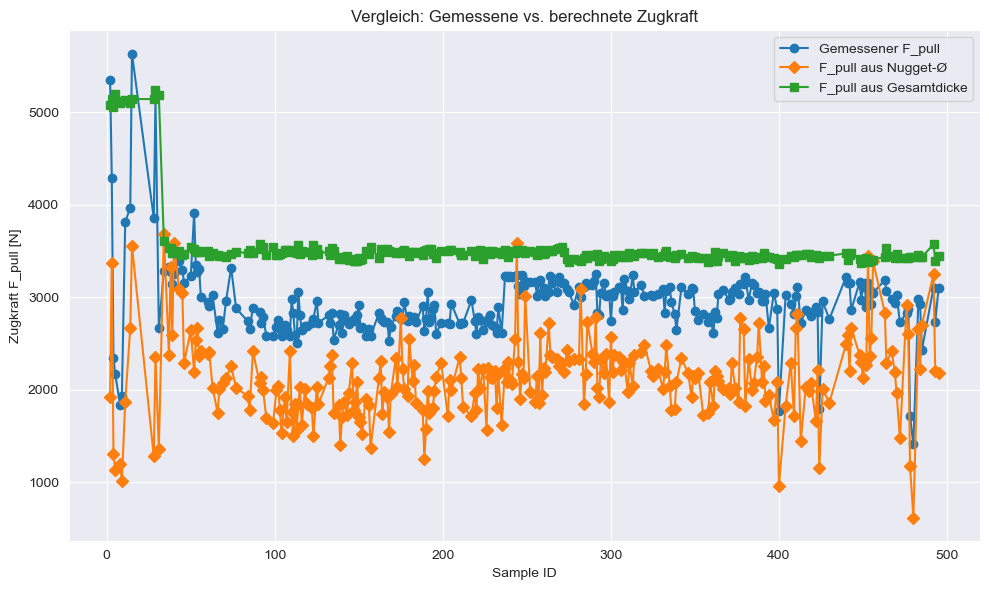

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV laden
df = pd.read_csv("data/train_data.csv")

# Konstante Scherfestigkeit
tau = 219  # N/mm²

# Berechnete Zugkraft basierend auf Nuggetdurchmesser
df["F_pull_from_nugget"] = (np.pi / 4) * df["NuggetDiameter (mm)"] ** 2 * tau

# Berechnete Zugkraft basierend auf Gesamtdicke
df["F_pull_from_thickness"] = (np.pi / 4) * (4 * np.sqrt(df["Thickness A+B (mm)"])) ** 2 * tau

# Nach Sample ID sortieren
df_sorted = df.sort_values("Sample ID")

# Optional: neuen Datensatz mit berechneten Werten speichern
df_sorted.to_csv("data/train_data_with_all_fpull.csv", index=False)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_sorted["Sample ID"], df_sorted["PullTest (N)"], label="Gemessener F_pull", marker='o')
plt.plot(df_sorted["Sample ID"], df_sorted["F_pull_from_nugget"], label="F_pull aus Nugget-Ø", marker='D')
plt.plot(df_sorted["Sample ID"], df_sorted["F_pull_from_thickness"], label="F_pull aus Gesamtdicke", marker='s')

plt.xlabel("Sample ID")
plt.ylabel("Zugkraft F_pull [N]")
plt.title("Vergleich: Gemessene vs. berechnete Zugkraft")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("vergleich_fpull_berechnungen.png")
plt.show()


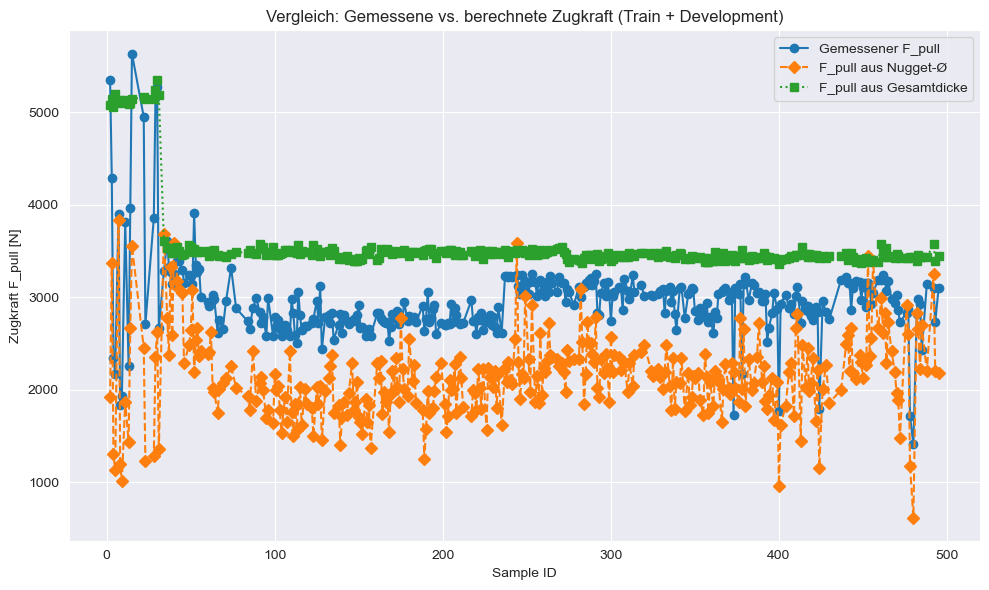

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Konstanten
tau = 219  # Scherfestigkeit in N/mm²

# Lade Datensätze
df_train = pd.read_csv("data/train_data.csv")
df_dev = pd.read_csv("data/development_data.csv")

# Kombiniere Daten
df_all = pd.concat([df_train, df_dev], ignore_index=True)

# Berechnungen
df_all["F_pull_from_nugget"] = (np.pi / 4) * df_all["NuggetDiameter (mm)"] ** 2 * tau
df_all["F_pull_from_thickness"] = (np.pi / 4) * (4 * np.sqrt(df_all["Thickness A+B (mm)"])) ** 2 * tau

# Nach Sample ID sortieren
df_sorted = df_all.sort_values("Sample ID")

# Neue CSV speichern
df_sorted.to_csv("data/all_data_with_fpull_estimations.csv", index=False)

# Plot erstellen
plt.figure(figsize=(10, 6))
plt.plot(df_sorted["Sample ID"], df_sorted["PullTest (N)"], label="Gemessener F_pull", marker='o', linestyle='-')
plt.plot(df_sorted["Sample ID"], df_sorted["F_pull_from_nugget"], label="F_pull aus Nugget-Ø", marker='D', linestyle='--')
plt.plot(df_sorted["Sample ID"], df_sorted["F_pull_from_thickness"], label="F_pull aus Gesamtdicke", marker='s', linestyle=':')

plt.xlabel("Sample ID")
plt.ylabel("Zugkraft F_pull [N]")
plt.title("Vergleich: Gemessene vs. berechnete Zugkraft (Train + Development)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("vergleich_fpull_gesamt.png")
plt.show()


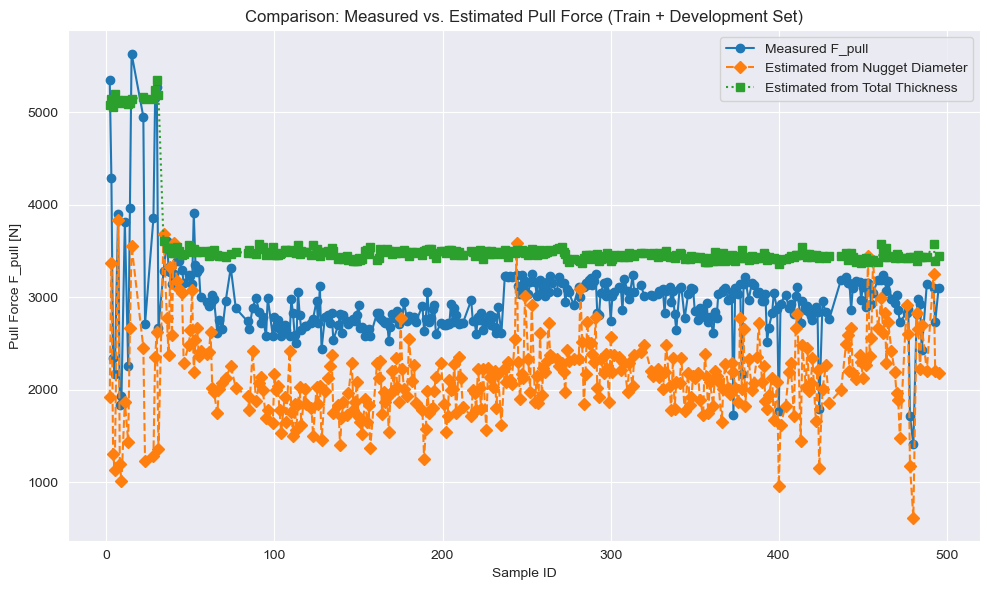

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Constant shear strength
tau = 219  # N/mm²

# Load datasets
df_train = pd.read_csv("data/train_data.csv")
df_dev = pd.read_csv("data/development_data.csv")

# Combine datasets
df_all = pd.concat([df_train, df_dev], ignore_index=True)

# Compute estimated pull forces
df_all["Estimated F_pull (from Nugget Diameter)"] = (np.pi / 4) * df_all["NuggetDiameter (mm)"] ** 2 * tau
df_all["Estimated F_pull (from Total Thickness)"] = (np.pi / 4) * (4 * np.sqrt(df_all["Thickness A+B (mm)"])) ** 2 * tau

# Sort by Sample ID
df_sorted = df_all.sort_values("Sample ID")

# Save new dataset
df_sorted.to_csv("data/all_data_with_fpull_estimations.csv", index=False)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted["Sample ID"], df_sorted["PullTest (N)"], label="Measured F_pull", marker='o', linestyle='-')
plt.plot(df_sorted["Sample ID"], df_sorted["Estimated F_pull (from Nugget Diameter)"], label="Estimated from Nugget Diameter", marker='D', linestyle='--')
plt.plot(df_sorted["Sample ID"], df_sorted["Estimated F_pull (from Total Thickness)"], label="Estimated from Total Thickness", marker='s', linestyle=':')

plt.xlabel("Sample ID")
plt.ylabel("Pull Force F_pull [N]")
plt.title("Comparison: Measured vs. Estimated Pull Force (Train + Development Set)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("comparison_fpull_all_english.png")
plt.show()


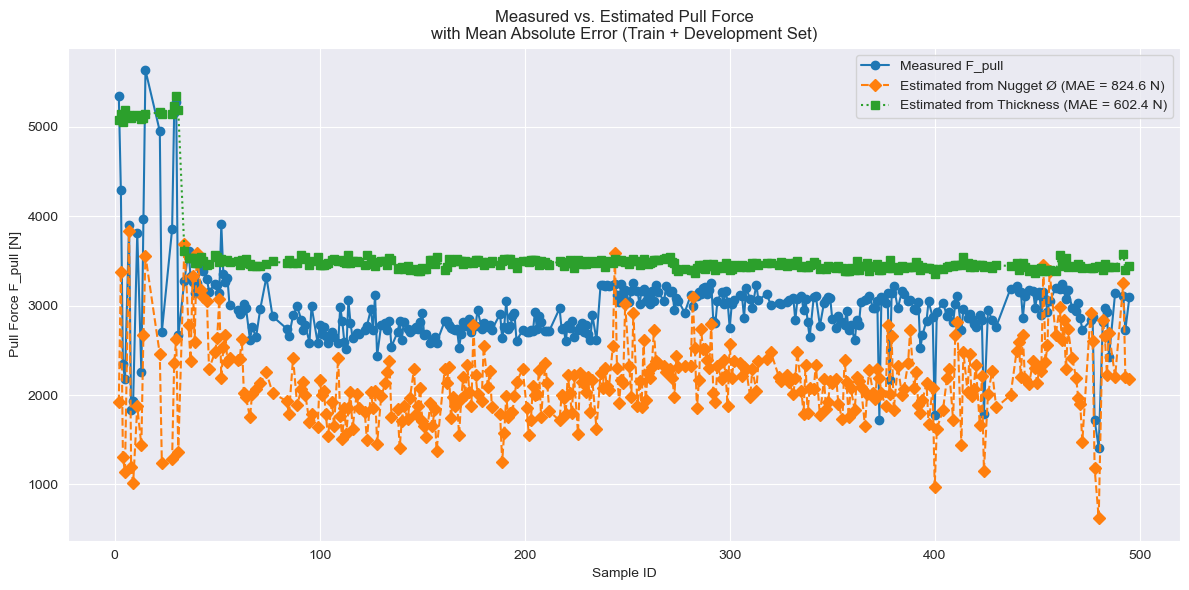

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Constant shear strength
tau = 219  # N/mm²

# Load datasets
df_train = pd.read_csv("data/train_data.csv")
df_dev = pd.read_csv("data/development_data.csv")

# Combine datasets
df_all = pd.concat([df_train, df_dev], ignore_index=True)

# Compute estimations
df_all["Estimated F_pull (from Nugget Diameter)"] = (np.pi / 4) * df_all["NuggetDiameter (mm)"] ** 2 * tau
df_all["Estimated F_pull (from Total Thickness)"] = (np.pi / 4) * (4 * np.sqrt(df_all["Thickness A+B (mm)"])) ** 2 * tau

# Sort by Sample ID
df_sorted = df_all.sort_values("Sample ID")

# Save to new CSV
df_sorted.to_csv("data/all_data_with_fpull_estimations.csv", index=False)

# Calculate MAE (mean absolute error)
mae_nugget = np.mean(np.abs(df_sorted["PullTest (N)"] - df_sorted["Estimated F_pull (from Nugget Diameter)"]))
mae_thickness = np.mean(np.abs(df_sorted["PullTest (N)"] - df_sorted["Estimated F_pull (from Total Thickness)"]))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_sorted["Sample ID"], df_sorted["PullTest (N)"], label="Measured F_pull", marker='o', linestyle='-')
plt.plot(df_sorted["Sample ID"], df_sorted["Estimated F_pull (from Nugget Diameter)"], label=f"Estimated from Nugget Ø (MAE = {mae_nugget:.1f} N)", marker='D', linestyle='--')
plt.plot(df_sorted["Sample ID"], df_sorted["Estimated F_pull (from Total Thickness)"], label=f"Estimated from Thickness (MAE = {mae_thickness:.1f} N)", marker='s', linestyle=':')

plt.xlabel("Sample ID")
plt.ylabel("Pull Force F_pull [N]")
plt.title("Measured vs. Estimated Pull Force\nwith Mean Absolute Error (Train + Development Set)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("comparison_fpull_with_mae.png")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Rusch\\Master\\tabpfn-industrial-eval\\plots\\fpull_comparison_all.png'

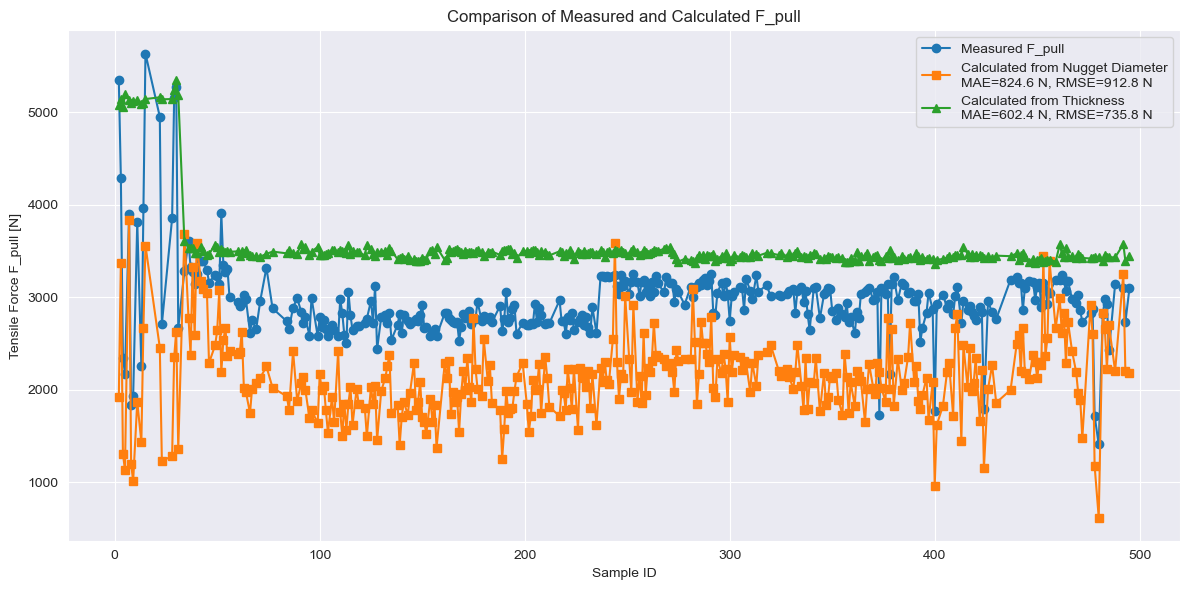

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
train = pd.read_csv("data/train_data.csv")
dev = pd.read_csv("data/development_data.csv")

# Combine datasets
df = pd.concat([train, dev], ignore_index=True)

# Constants
tau = 219  # shear strength in N/mm²

# Calculations
df["F_pull_from_nugget"] = (np.pi / 4) * df["NuggetDiameter (mm)"] ** 2 * tau
df["F_pull_from_thickness"] = (np.pi / 4) * (4 * np.sqrt(df["Thickness A+B (mm)"])) ** 2 * tau

# Sort by Sample ID
df_sorted = df.sort_values("Sample ID")

# Calculate MAE and RMSE
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

mae_nugget = mae(df_sorted["PullTest (N)"], df_sorted["F_pull_from_nugget"])
rmse_nugget = rmse(df_sorted["PullTest (N)"], df_sorted["F_pull_from_nugget"])

mae_thickness = mae(df_sorted["PullTest (N)"], df_sorted["F_pull_from_thickness"])
rmse_thickness = rmse(df_sorted["PullTest (N)"], df_sorted["F_pull_from_thickness"])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_sorted["Sample ID"], df_sorted["PullTest (N)"], label="Measured F_pull", marker='o')
plt.plot(df_sorted["Sample ID"], df_sorted["F_pull_from_nugget"],
         label=f"Calculated from Nugget Diameter\nMAE={mae_nugget:.1f} N, RMSE={rmse_nugget:.1f} N", marker='s')
plt.plot(df_sorted["Sample ID"], df_sorted["F_pull_from_thickness"],
         label=f"Calculated from Thickness\nMAE={mae_thickness:.1f} N, RMSE={rmse_thickness:.1f} N", marker='^')

plt.xlabel("Sample ID")
plt.ylabel("Tensile Force F_pull [N]")
plt.title("Comparison of Measured and Calculated F_pull")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/fpull_comparison_all.png")
plt.show()
